In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
from shutil import copy

In [12]:
a=pd.read_csv('C:/Users/varun/OneDrive/Desktop/Yolo/labels_train.csv')
b=pd.read_csv('C:/Users/varun/OneDrive/Desktop/Yolo/labels_trainval.csv')
c=pd.read_csv('C:/Users/varun/OneDrive/Desktop/Yolo/labels_val.csv')

In [13]:
df=pd.concat([a,b,c],axis=0)
df.head()

,frame,xmin,xmax,ymin,ymax,class_id
0,1478019952686311006.jpg,237,251,143,155,1
1,1478019952686311006.jpg,437,454,120,186,3
2,1478019953180167674.jpg,218,231,146,158,1
3,1478019953689774621.jpg,171,182,141,154,2
4,1478019953689774621.jpg,179,191,144,155,1


In [14]:
df.shape

(330210, 6)

In [18]:
data=df.drop(['xmin','xmax','ymin','ymax'],axis=1)
data=data.drop_duplicates()
data.head()

,frame,class_id
0,1478019952686311006.jpg,1
1,1478019952686311006.jpg,3
2,1478019953180167674.jpg,1
3,1478019953689774621.jpg,2
4,1478019953689774621.jpg,1


In [19]:
a=data['class_id'].value_counts()[1]
b=data['class_id'].value_counts()[2]
c=data['class_id'].value_counts()[3]
d=data['class_id'].value_counts()[4]
e=data['class_id'].value_counts()[5]

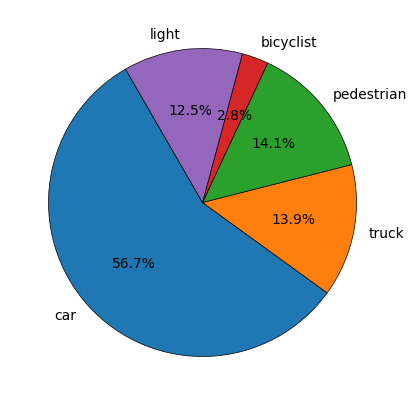

<Figure size 640x480 with 0 Axes>

In [20]:
classes = ['car', 'truck', 'pedestrian', 'bicyclist', 'light']
data = [a,b,c,d,e]

fig = plt.figure(figsize =(7,5))
plt.pie(data, labels = classes,autopct='%1.1f%%',startangle=120,wedgeprops = {"edgecolor" : "black", 'linewidth': 0.5})
plt.show()
plt.savefig('images in each class.png')

In [21]:
a=df['class_id'].value_counts()[1]
b=df['class_id'].value_counts()[2]
c=df['class_id'].value_counts()[3]
d=df['class_id'].value_counts()[4]
e=df['class_id'].value_counts()[5]

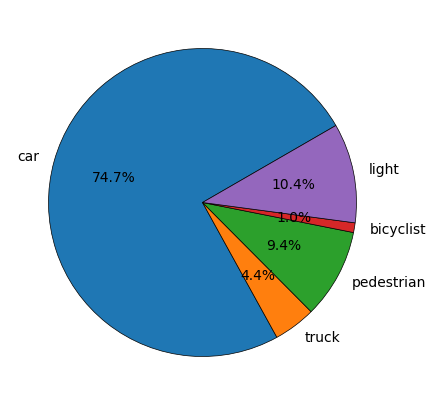

<Figure size 640x480 with 0 Axes>

In [22]:
classes = ['car', 'truck', 'pedestrian', 'bicyclist', 'light']
data = [123303,7322,15538,1676,17243]

fig = plt.figure(figsize =(7,5))
plt.pie(data,
        labels = classes,
        autopct='%1.1f%%',
        startangle=30,
        wedgeprops = {"edgecolor" : "black", 'linewidth': 0.5})

plt.show()
plt.savefig('bounding boxes of each class.jpg')

In [23]:
images=df['frame'].unique()
len(images)

22241

In [24]:
dic={1:0,2:1,3:2,4:3,5:4}

In [25]:
df=df.replace({"class_id": dic})

In [33]:
def move_data(filename,src,destination):
    
    src=os.path.join(src,filename)
    dest=os.path.join(destination,filename)
    copy(src,dest)

In [40]:
class_data=['zeroimages','oneimages','twoimages','threeimages','fourimages']
i=0
for folder in class_data:
    
    dest=os.path.join('C:/Users/varun/OneDrive/Desktop/Yolo',folder)
    src='C:/Users/varun/OneDrive/Desktop/Yolo/images 1'
    os.mkdir(dest)
    data1=df[df['class_id']==i]
    i+=1
    Series=pd.Series(data1['frame'].unique())
    Series.apply(move_data,args=(src,dest))

In [65]:
os.chdir('C:/Users/varun/OneDrive/Desktop/Yolo/images')
images=os.listdir()
len(images)

9139

In [66]:
new_df=df.query(f'frame in {images}')

In [67]:
new_df.head()

,frame,xmin,xmax,ymin,ymax,class_id
0,1478019952686311006.jpg,237,251,143,155,0
1,1478019952686311006.jpg,437,454,120,186,2
2,1478019953180167674.jpg,218,231,146,158,0
3,1478019953689774621.jpg,171,182,141,154,1
4,1478019953689774621.jpg,179,191,144,155,0


In [68]:
new_df['centre_x']=((new_df['xmin']+new_df['xmax'])/2)/480
new_df['centre_y']=((new_df['ymin']+new_df['ymax'])/2)/300
new_df['w']=(new_df['xmax']-new_df['xmin'])/480
new_df['h']=(new_df['ymax']-new_df['ymin'])/300

C:\Users\varun\AppData\Local\Temp\ipykernel_29344\615772299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['centre_x']=((new_df['xmin']+new_df['xmax'])/2)/480
C:\Users\varun\AppData\Local\Temp\ipykernel_29344\615772299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['centre_y']=((new_df['ymin']+new_df['ymax'])/2)/300
C:\Users\varun\AppData\Local\Temp\ipykernel_29344\615772299.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [69]:
new_df.head()

,frame,xmin,xmax,ymin,ymax,class_id,centre_x,centre_y,w,h
0,1478019952686311006.jpg,237,251,143,155,0,0.508333,0.496667,0.029167,0.040000
1,1478019952686311006.jpg,437,454,120,186,2,0.928125,0.510000,0.035417,0.220000
2,1478019953180167674.jpg,218,231,146,158,0,0.467708,0.506667,0.027083,0.040000
3,1478019953689774621.jpg,171,182,141,154,1,0.367708,0.491667,0.022917,0.043333
4,1478019953689774621.jpg,179,191,144,155,0,0.385417,0.498333,0.025000,0.036667


In [70]:
images=new_df['frame'].unique()
len(images)

9139

In [ ]:
yolov5

In [48]:
train='C:/Users/varun/OneDrive/Desktop/Yolo/train_images'
test='C:/Users/varun/OneDrive/Desktop/Yolo/test_images'

os.mkdir(train)
os.mkdir(test)

In [71]:
img_data=pd.DataFrame(images,columns=['filename'])
img_train=tuple(img_data.sample(frac=0.7)['filename'])
img_test=tuple(img_data.query(f'filename not in {img_train}')['filename'])

In [57]:
train_data=new_df.query(f'frame in {img_train}')
test_data=new_df.query(f'frame in {img_test}')

In [58]:
train_grp=train_data[['frame','class_id','centre_x','centre_y','w','h']].groupby('frame')
test_grp=test_data[['frame','class_id','centre_x','centre_y','w','h']].groupby('frame')

In [59]:
train_keys=pd.Series(train_grp.groups.keys())
test_keys=pd.Series(test_grp.groups.keys())

In [63]:
def save_data(filename,foldername,grp_obj):
    
    src=os.path.join('C:/Users/varun/OneDrive/Desktop/Yolo/images',filename)
    dest=os.path.join(foldername,filename)
    copy(src,dest)
    
    text_name=os.path.join(foldername+'/'+os.path.splitext(filename)[0]+'.txt')
    grp_obj.get_group(filename).set_index('frame').to_csv(text_name,sep=' ',index=False,header=False)

In [64]:
train_keys.apply(save_data,args=(train,train_grp))

0       None
1       None
2       None
3       None
4       None
        ... 
6569    None
6570    None
6571    None
6572    None
6573    None
Length: 6574, dtype: object

In [65]:
test_keys.apply(save_data,args=(test,test_grp))

0       None
1       None
2       None
3       None
4       None
        ... 
2812    None
2813    None
2814    None
2815    None
2816    None
Length: 2817, dtype: object

YOLOv3

In [73]:
os.chdir('C:/Users/varun/OneDrive/Desktop/Yolo/test_images')
images=os.listdir('C:/Users/varun/OneDrive/Desktop/Yolo/test_images')
len(images)

5636

In [74]:
os.chdir('C:/Users/varun/OneDrive/Desktop/Yolo/train_images')
images1=os.listdir('C:/Users/varun/OneDrive/Desktop/Yolo/train_images')
len(images1)

13149

In [75]:
res = [i for i in images if '.jpg' in i]

In [76]:
res1=[i for i in images1 if '.jpg' in i]

In [77]:
os.chdir('C:/Users/varun/OneDrive/Desktop/YOLO')

In [78]:
with open("train.txt", "w") as f:
    for i in res1:
        f.write("C:/Users/varun/OneDrive/Desktop/Yolo/test_images/"+i)

In [79]:
with open("test.txt", "w") as f:
    for i in res:
        f.write("C:/Users/varun/OneDrive/Desktop/Yolo/test_images/"+i)
        f.write('\n')